In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix , lag_plot , autocorrelation_plot

In [21]:
#===============================================
# Small helper to keep formatting consistent.
#===============================================
hw = {
    "figsize": (9 , 4) ,
    "grid": True ,
    "legend": True ,
    "alpha": 0.85 ,
    "lw": 2 ,
}

def finish(ax , title , xlabel = None , ylabel = None):
    ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    return ax

In [22]:
#=========
# Setup
#=========
np.random.seed(928)

ts = pd.DataFrame({
    "month": pd.date_range("2025-01-01" , periods = 12 , freq = "MS") ,
    "sales": np.round(np.linspace(900 , 1400 , 12) + np.random.normal(0 , 60 , 12) , 0) ,
    "returns": np.round(np.linspace(40 , 70 , 12) + np.random.normal(0 , 6 , 12) , 0) ,
    "conversion_rate": np.clip(np.linspace(0.018 , 0.032 , 12) + np.random.normal(0 , 0.002 , 12) , 0.01 , 0.05)
}).set_index("month")
ts

df_err = pd.DataFrame({
    "region": np.random.choice(["East" , "West" , "Central"] , size = 120 , p = [0.4 , 0.35 , 0.25]) ,
    "delivery_days": np.clip(np.random.normal(4.5 , 1.2 , 120) , 1 , None) ,
})
df_err

df_num = pd.DataFrame({
    "ad_spend": np.random.gamma(2.2 , 50 , 150) ,
    "orders": np.random.poisson(18 , 150).clip(min = 1) ,
})
df_num["discount"] = np.random.uniform(0 , 0.25 , 150)
df_num["revenue"] = (df_num["ad_spend"] * (2.2 - df_num["discount"]) + np.random.normal(0 , 60 , 150)).clip(lower = 0)
df_num

,sales,returns,conversion_rate
month,,,
2025-01-01,1000.0,41.0,0.020283
2025-02-01,988.0,43.0,0.021137
2025-03-01,985.0,42.0,0.019507
2025-04-01,1017.0,45.0,0.019751
2025-05-01,1049.0,47.0,0.023562
2025-06-01,1169.0,49.0,0.025350
2025-07-01,1199.0,55.0,0.024967
2025-08-01,1172.0,70.0,0.029116
2025-09-01,1297.0,58.0,0.028286


,region,delivery_days
0,East,2.508558
1,West,3.247607
2,East,3.801396
3,East,2.171936
4,West,3.347695
...,...,...
115,Central,4.151911
116,East,4.588536
117,Central,5.340920
118,East,1.584897


,ad_spend,orders,discount,revenue
0,129.982244,14,0.081012,275.355195
1,13.512366,15,0.142820,86.387435
2,198.565761,11,0.230667,463.971319
3,48.697533,15,0.131128,118.998613
4,158.628730,17,0.141691,404.859780
...,...,...,...,...
145,145.053340,15,0.032363,315.780245
146,29.323541,16,0.235364,45.259855
147,45.183178,17,0.042434,57.443485
148,136.152106,20,0.106987,234.061252


Text(0.5, 1.0, 'Case 1: Sales')

Text(0.5, 1.0, 'Case 1: Returns')

Text(0.5, 1.0, 'Case 1: Conversion Rate')

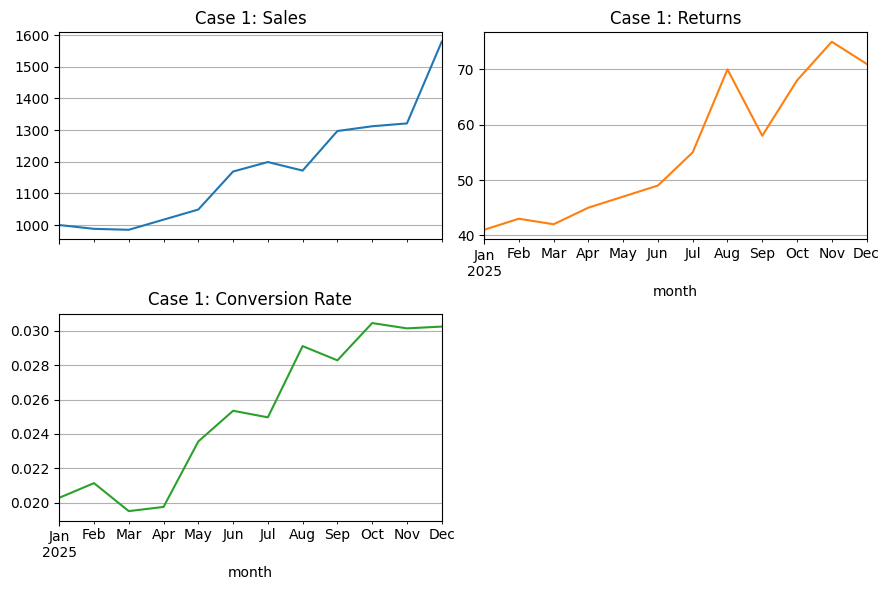

In [23]:
#=============================
# Case 1) Subplots + layout
#=============================
axes = ts[["sales" , "returns" , "conversion_rate"]].plot(
    subplots = True , layout = (2 , 2) , figsize = (9 , 6) ,
    grid = hw["grid"] , legend = False
)

titles = ["Sales" , "Returns" , "Conversion Rate"]
for ax , t in zip(axes.flatten() , titles):
    if ax is not None:
        ax.set_title(f"Case 1: {t}")
        ax.grid(hw["grid"])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sales')

Text(0, 0.5, 'Conversion rate')

<Axes: title={'center': 'Case 2: Sales vs Conversion Rate (Secondary y-axis)'}, xlabel='Month', ylabel='Sales'>

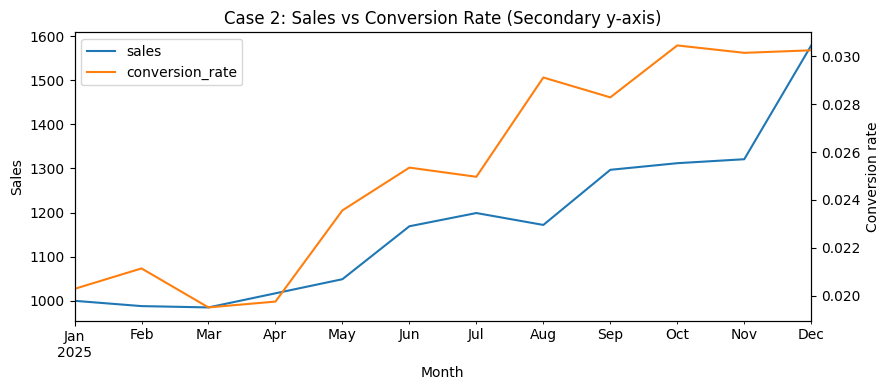

In [24]:
#============================
# Case 2) Secondary Y-axis
#============================
ax = ts[["sales" , "conversion_rate"]].plot(
    figsize = hw["figsize"] , secondary_y = ["conversion_rate"] ,
    mark_right = False
)
ax.set_ylabel("Sales")
ax.right_ax.set_ylabel("Conversion rate")
finish(ax , "Case 2: Sales vs Conversion Rate (Secondary y-axis)" , xlabel = "Month")
plt.show()

<Axes: title={'center': 'Case 3: Avg delivery days by region (with error bars)'}, xlabel='Region', ylabel='Days'>

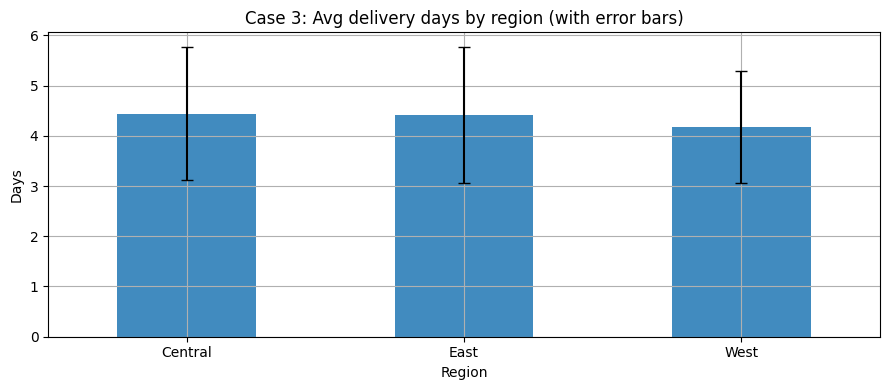

In [25]:
#=====================================
# Case 3) Error bars (mean +/- std)
#=====================================
summary = df_err.groupby("region")["delivery_days"].agg(mean = "mean" , sd = "std").sort_values("mean" , ascending = False)
ax = summary["mean"].plot(
    kind = "bar" , yerr = summary["sd"] , capsize = 4 ,
    alpha = hw["alpha"] , figsize = hw["figsize"] ,
    grid = hw["grid"] , legend = False ,
)
ax.tick_params(axis = "x" , rotation = 0)
finish(ax , "Case 3: Avg delivery days by region (with error bars)" , xlabel = "Region" , ylabel = "Days")
plt.show()

<Axes: title={'center': 'Case 4: Trend + table (last 4 months)'}, xlabel='Month', ylabel='Value'>

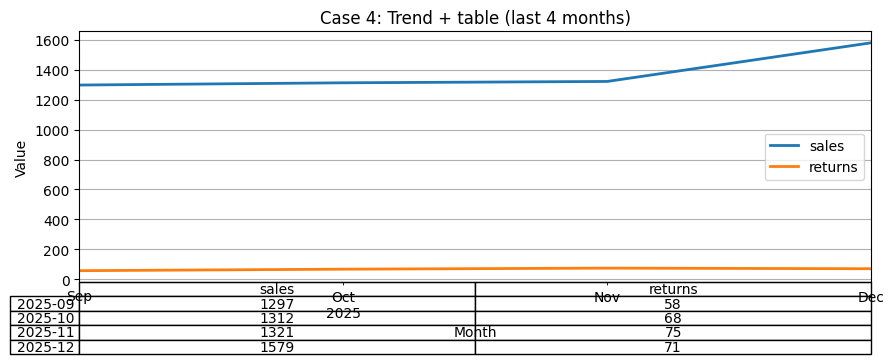

In [26]:
#=======================================
# Case 4) Add a table under the plot
#=======================================
kpi = ts[["sales" , "returns"]].tail(4).copy()
ax = kpi.plot(figsize = hw["figsize"] , lw = hw["lw"] , grid = hw["grid"])
finish(ax , "Case 4: Trend + table (last 4 months)" , xlabel = "Month" , ylabel = "Value")
ax.table(
    cellText = np.round(kpi.to_numpy() , 0).astype(int) ,
    rowLabels = [d.strftime("%Y-%m") for d in kpi.index] ,
    colLabels = list(kpi.columns) ,
    loc = "bottom" , cellLoc = "center" ,
)
plt.subplots_adjust(bottom = 0.28)
plt.show()

Text(0.5, 1.02, 'Case 5: Scatter Matrix (pairwise relationships)')

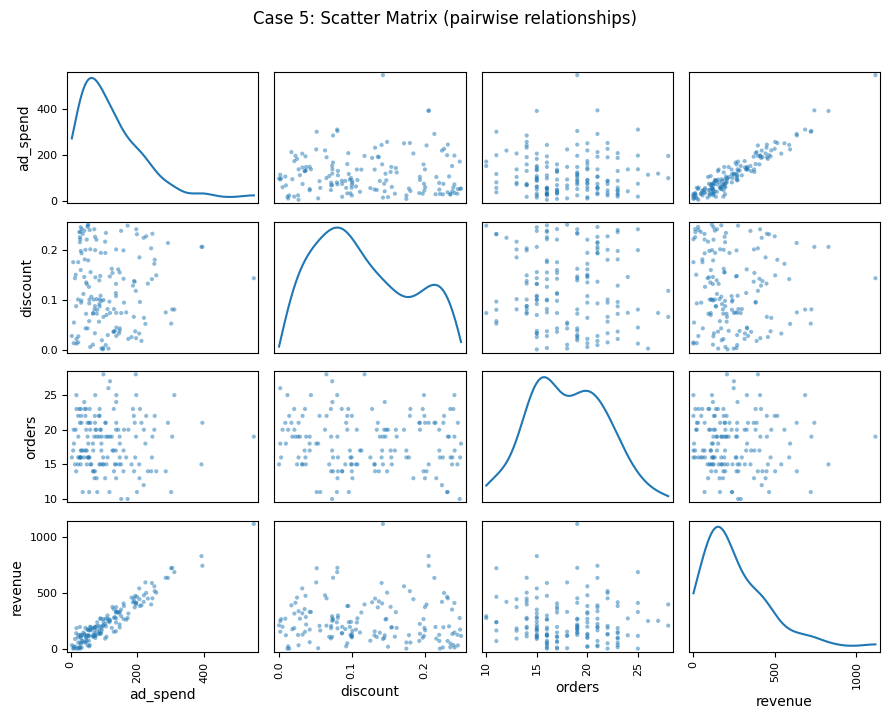

In [27]:
#=============================================
# Case 5) Scatter Matrix (Multivariate EDA)
#=============================================
axes = scatter_matrix(
    df_num[["ad_spend" , "discount" , "orders" , "revenue"]] ,
    figsize = (9 , 7) , diagonal = "kde" , alpha = 0.5
)
plt.suptitle("Case 5: Scatter Matrix (pairwise relationships)" , y = 1.02)
plt.tight_layout()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

<Axes: title={'center': 'Case 6a: Lag Plot (sales)'}, xlabel='sales[t - 1]', ylabel='sales[t]'>

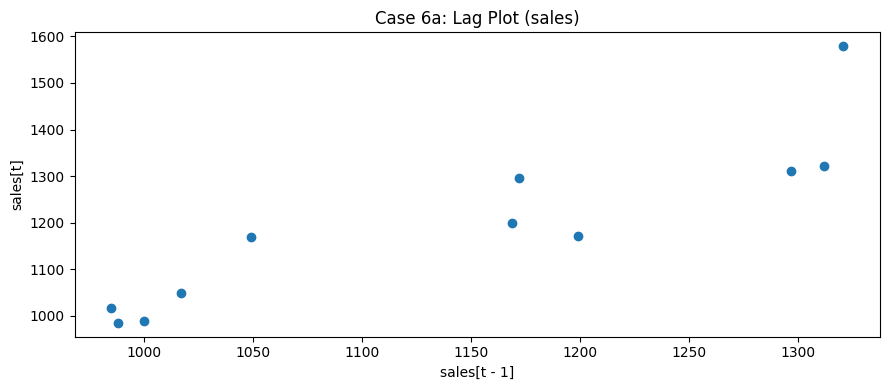

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Axes: title={'center': 'Case 6b: Autocorrelation Plot (sales)'}, xlabel='Lag', ylabel='Autocorrelation'>

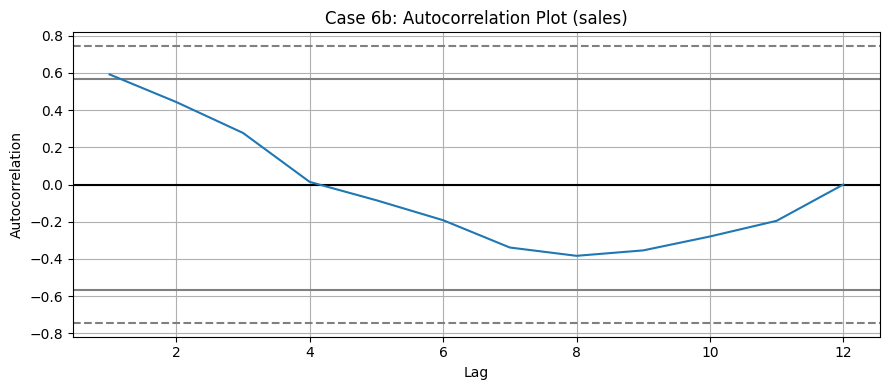

In [28]:
#====================================
# Case 6) Time-series diagnostics
#====================================
series = ts["sales"]

fig , ax = plt.subplots(figsize = hw["figsize"])
lag_plot(series , ax = ax)
finish(ax , "Case 6a: Lag Plot (sales)" , xlabel = "sales[t - 1]" , ylabel = "sales[t]")
plt.show()

fig , ax = plt.subplots(figsize = hw["figsize"])
autocorrelation_plot(series , ax = ax)
finish(ax , "Case 6b: Autocorrelation Plot (sales)" , xlabel = "Lag" , ylabel = "Autocorrelation")
plt.show()